In [21]:
import requests
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prava\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
api_key = "4f8016edb36a4e7ca300ecc95e5ee10a"

#Companys used
company_tickers = ['AMD', 'AMZN', 'FB', 'GOOG']

# Initializing sentiment_results dictionary
sentiment_results = {}


In [25]:
buy_threshold = 0.1
# Define a list of colors for the graphs
colors = ['blue', 'red', 'green', 'orange']

IndexError: list index out of range

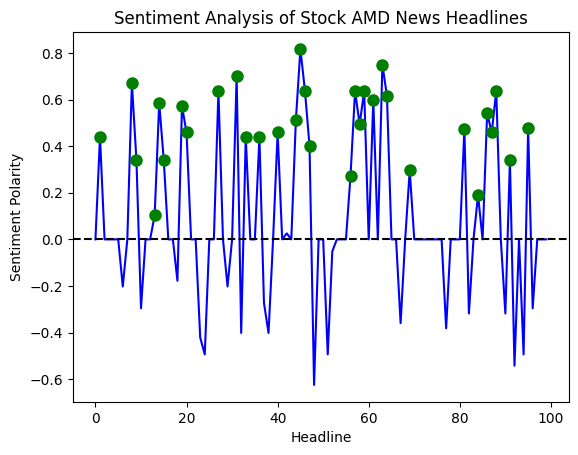

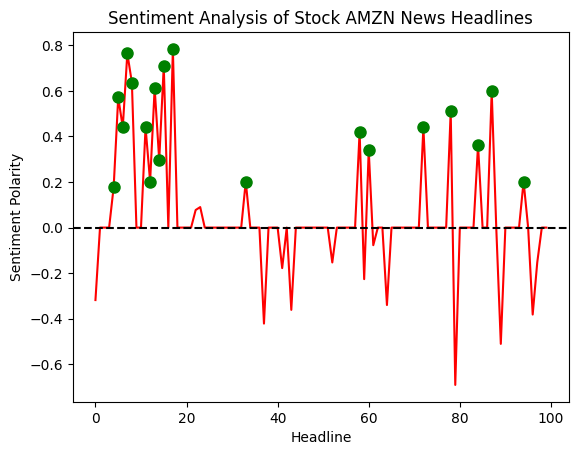

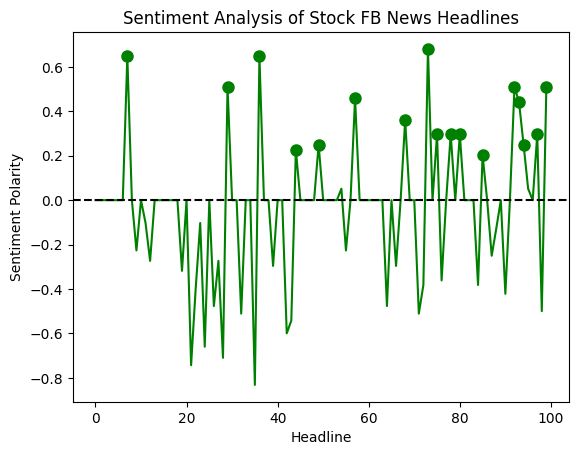

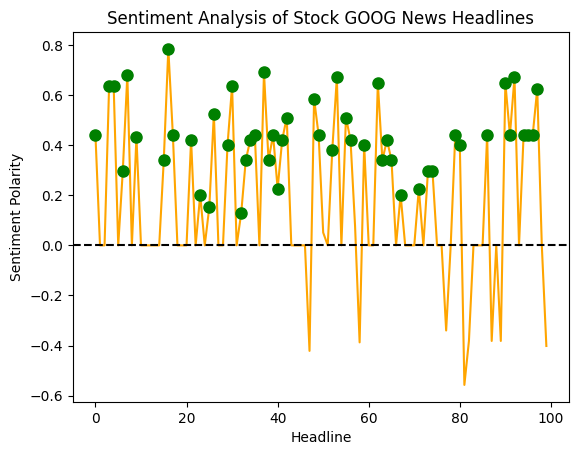

<Figure size 640x480 with 0 Axes>

In [15]:
# Fetch news headlines and perform sentiment analysis for each company ticker
for i, ticker in enumerate(company_tickers):
    # Define the API endpoint URL
    url = f"https://newsapi.org/v2/everything?q={ticker}&language=en&apiKey={api_key}"

    # Make a GET request to the API
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the response JSON
        data = response.json()

        # Get the news articles
        articles = data.get('articles', [])
         # Get the news articles
        articles = data.get('articles', [])

        # Perform sentiment analysis on each article headline
        sentiments = []
        sid = SentimentIntensityAnalyzer()
        for article in articles:
            headline = article.get('title', '')
            scores = sid.polarity_scores(headline)
            sentiment = scores['compound']
            sentiments.append(sentiment)

        # Store the sentiments in the sentiment_results dictionary
        sentiment_results[ticker] = sentiments

        # Generate a line plot for the sentiments with a unique color
        plt.figure()
        plt.plot(sentiments, color=colors[i])
        plt.axhline(0, color='black', linestyle='--')
        plt.title(f'Sentiment Analysis of Stock {ticker} News Headlines')
        plt.xlabel('Headline')
        plt.ylabel('Sentiment Polarity')

        # Add markers to indicate buying decision
        buy_markers = [i for i, sentiment in enumerate(sentiments) if sentiment >= buy_threshold]
        plt.plot(buy_markers, np.array(sentiments)[buy_markers], 'go', markersize=8, label='Buy')




Text(0, 0.5, 'Mean Sentiment Polarity')

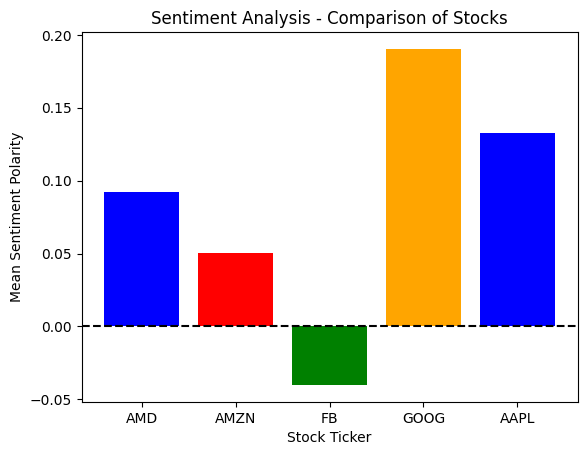

In [17]:
# Generate a bar graph comparing the sentiment results of all stocks
plt.figure()
tickers = sentiment_results.keys()
mean_sentiments = [np.mean(sentiments) for sentiments in sentiment_results.values()]
plt.bar(tickers, mean_sentiments, color=colors[:len(tickers)])
plt.axhline(0, color='black', linestyle='--')
plt.title('Sentiment Analysis - Comparison of Stocks')
plt.xlabel('Stock Ticker')
plt.ylabel('Mean Sentiment Polarity')